In [2]:
import numpy as np            # NumPy is used for numerical operations on arrays.
import pandas as pd           # Pandas is used for data manipulation and analysis.
import matplotlib.pyplot as plt # Matplotlib is used for plotting and visualizing data.
# %matplotlib inline            # This is a magic command for Jupyter notebooks to display plots inline.

In [4]:
df = pd.read_csv('SuperMart.csv', encoding='unicode_escape')

In [6]:
df.shape  # Returns the number of rows and columns in the DataFrame.

(11251, 15)

In [8]:
df.head()  # Displays the first five rows of the DataFrame.

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [10]:
df.info()  # Provides a summary of the DataFrame, including data types, non-null counts, and memory usage.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [12]:
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [14]:
pd.isnull(df).sum() 

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [16]:
df.dropna(inplace=True)  # Removes any rows with missing values from the DataFrame.



In [18]:
df.dropna(inplace=True)  # Removes any rows with missing values from the DataFrame.

# Change the data type of the 'Amount' column to integer
df['Amount'] = df['Amount'].astype('int')

In [20]:
df['Amount'].dtypes


dtype('int32')

In [22]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [24]:
df.rename(columns={'Marital_Status': 'status'},inplace=True)


In [26]:
df['status'] = df['status'].replace({0:'No', 1:'Yes'})


In [28]:
df.describe()

,User_ID,Age,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,2.489634,9453.610553
std,1.716039e+03,12.753866,1.114967,5222.355168
min,1.000001e+06,12.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,4.000000,23952.000000


In [30]:
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


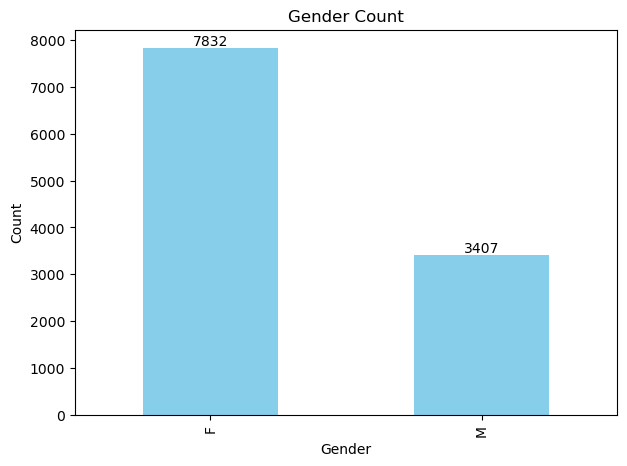

In [32]:
# Plot a bar chart for Gender and its count
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(7, 5))
ax = gender_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Count')
ax.bar_label(ax.containers[0])
plt.show()

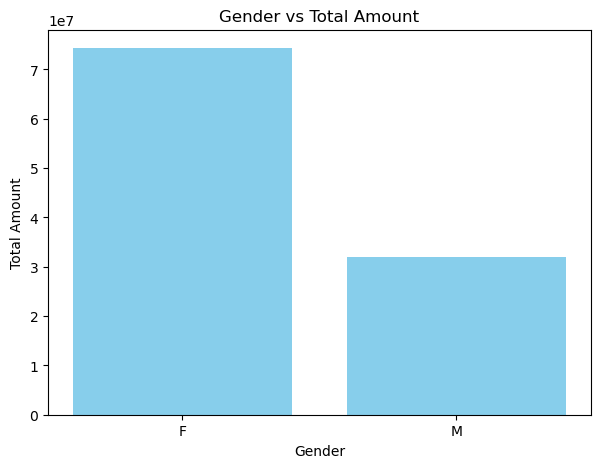

In [34]:
# Plot a bar chart for Gender vs Total Amount
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
plt.figure(figsize=(7, 5))
plt.bar(sales_gen['Gender'], sales_gen['Amount'], color='skyblue')
plt.xlabel('Gender')
plt.ylabel('Total Amount')
plt.title('Gender vs Total Amount')
plt.show()


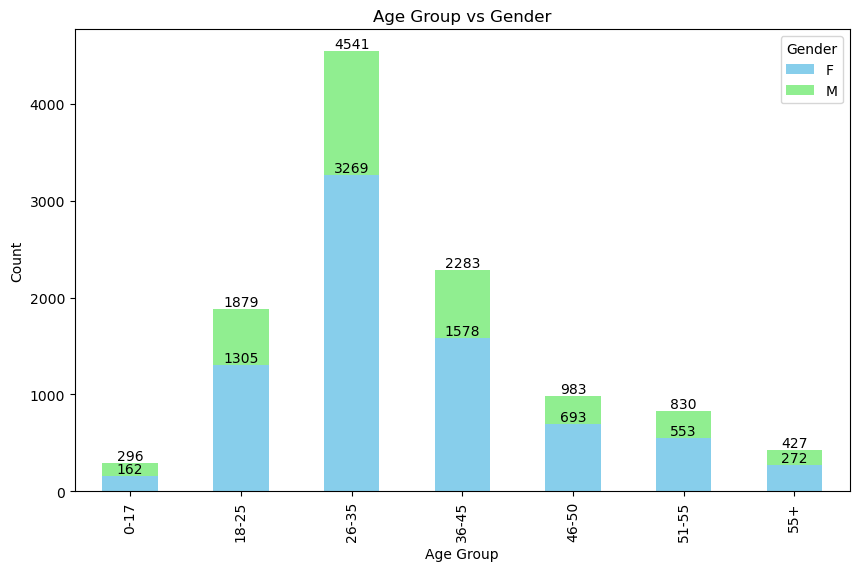

In [36]:
age_gender_counts = df.groupby(['Age Group', 'Gender']).size().unstack(fill_value=0)
ax = age_gender_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'lightgreen'])
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age Group vs Gender')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

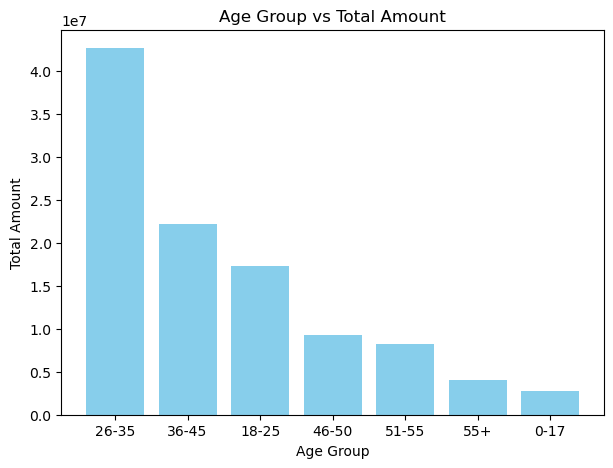

In [38]:
# Plot Total Amount vs Age Group
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
plt.figure(figsize=(7, 5))
plt.bar(sales_age['Age Group'], sales_age['Amount'], color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('Total Amount')
plt.title('Age Group vs Total Amount')
plt.show()

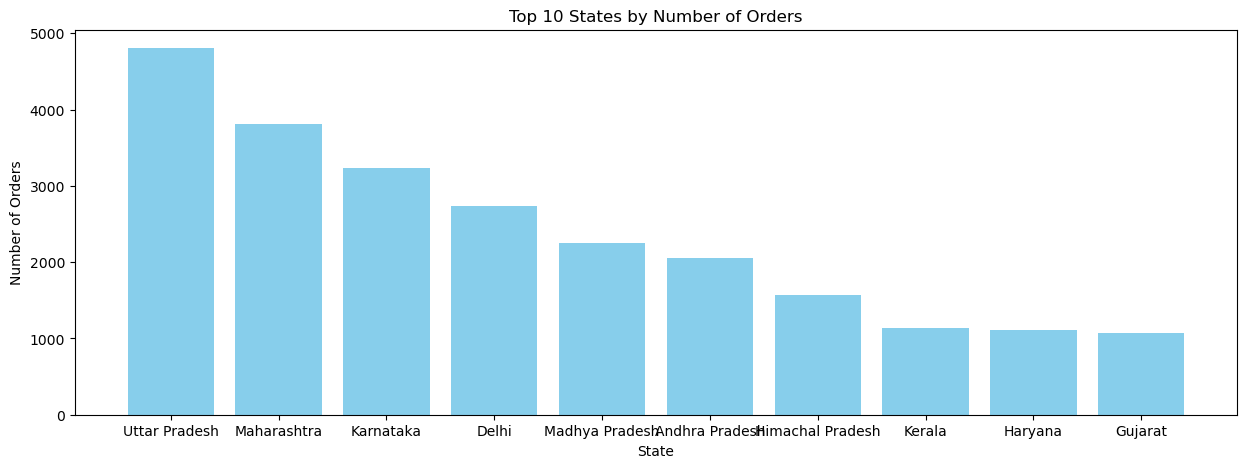

In [40]:
# Plot the total number of orders from the top 10 states
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
plt.figure(figsize=(15, 5))
plt.bar(sales_state['State'], sales_state['Orders'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Number of Orders')
plt.title('Top 10 States by Number of Orders')
plt.show()

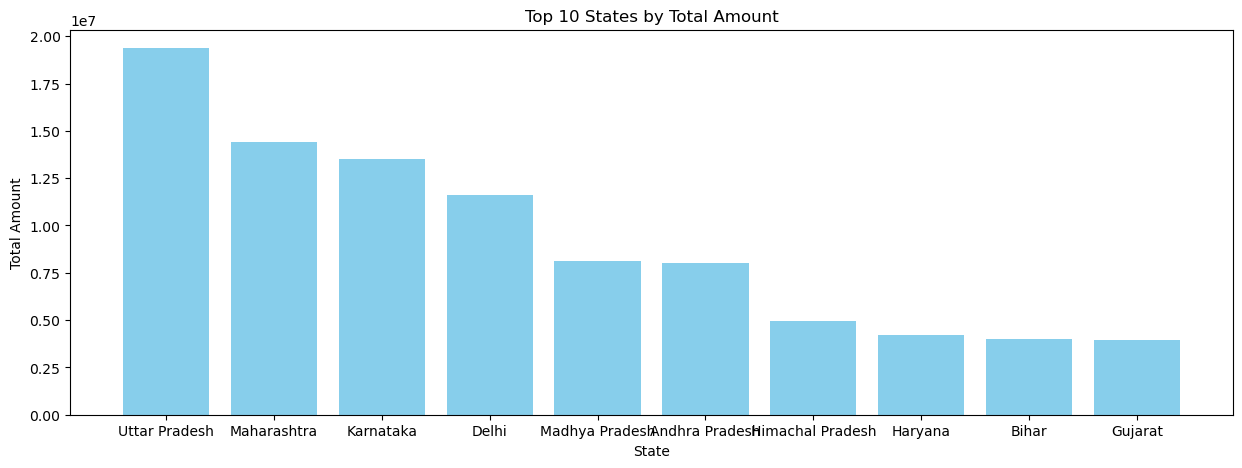

In [42]:
# Plot the total amount/sales from the top 10 states
sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
plt.figure(figsize=(15, 5))
plt.bar(sales_state['State'], sales_state['Amount'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Total Amount')
plt.title('Top 10 States by Total Amount')
plt.show()

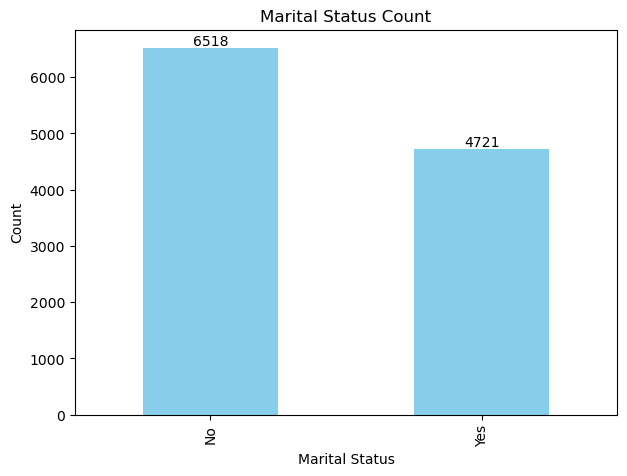

In [44]:
# Plot a count of Marital Status
marital_status_counts = df['status'].value_counts()
plt.figure(figsize=(7, 5))
ax = marital_status_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Marital Status Count')
ax.bar_label(ax.containers[0])
plt.show()

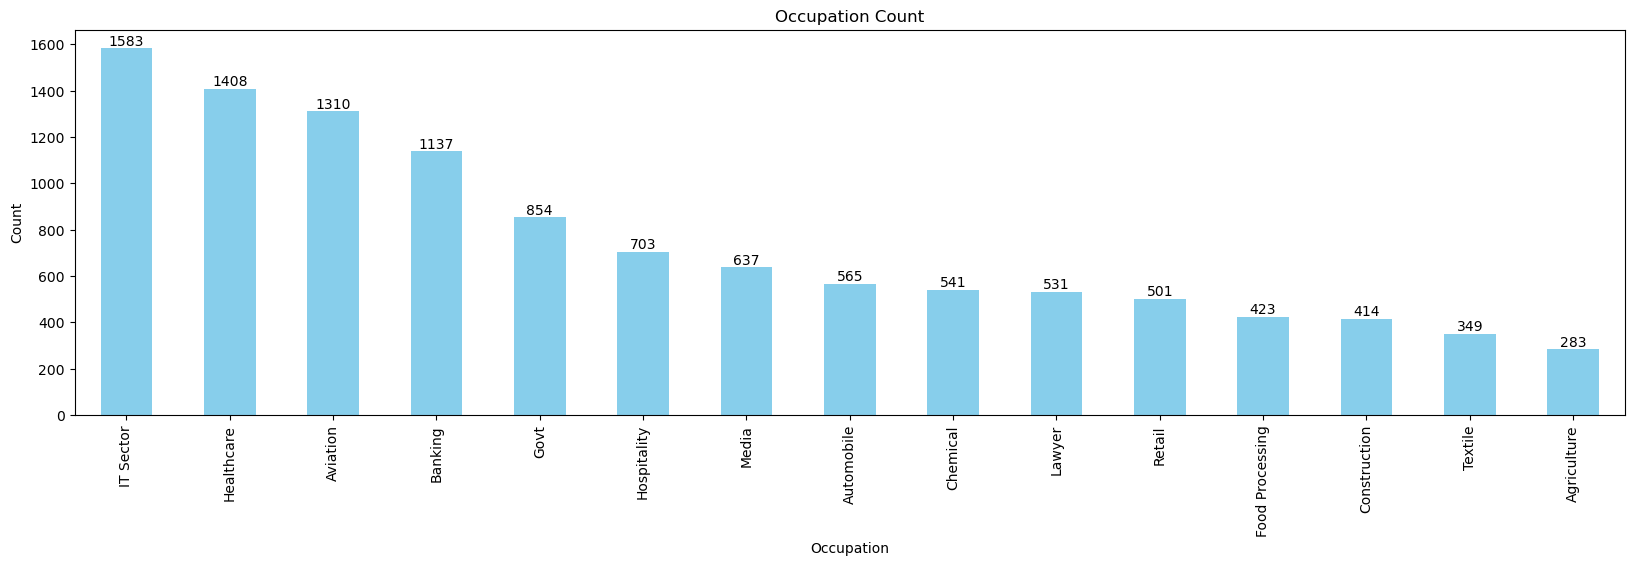

In [46]:
# Plot a count of Occupation
occupation_counts = df['Occupation'].value_counts()
plt.figure(figsize=(20, 5))
ax = occupation_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Occupation Count')
ax.bar_label(ax.containers[0])
plt.show()

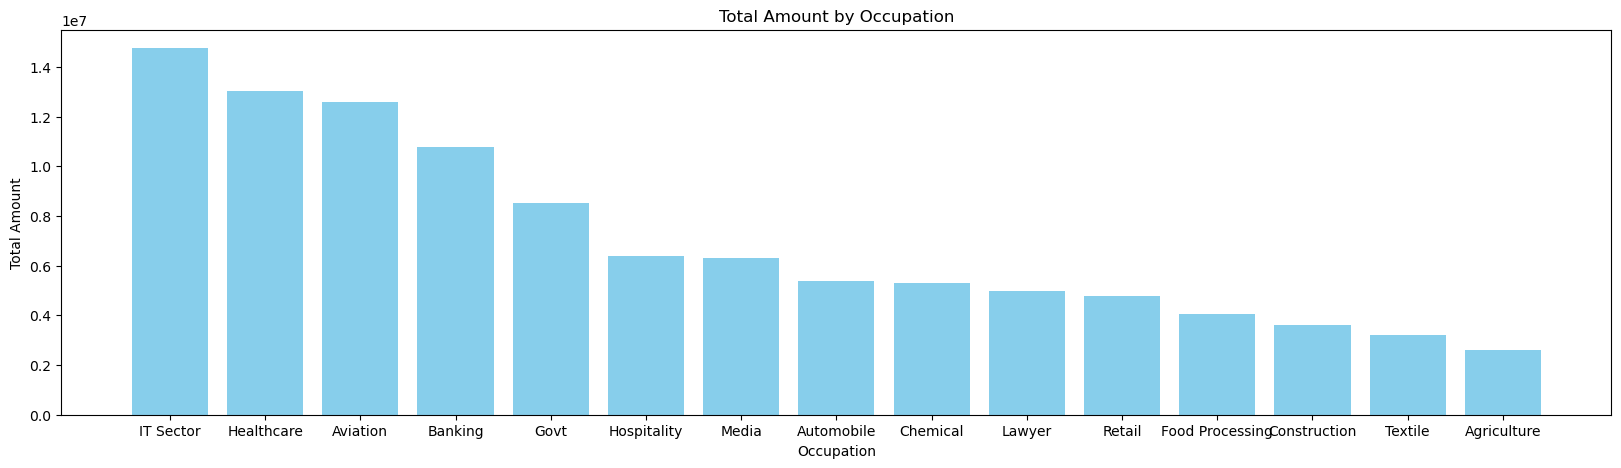

In [48]:
# Plot the total sales amount by occupation
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
plt.figure(figsize=(20, 5))
plt.bar(sales_state['Occupation'], sales_state['Amount'], color='skyblue')
plt.xlabel('Occupation')
plt.ylabel('Total Amount')
plt.title('Total Amount by Occupation')
plt.show()

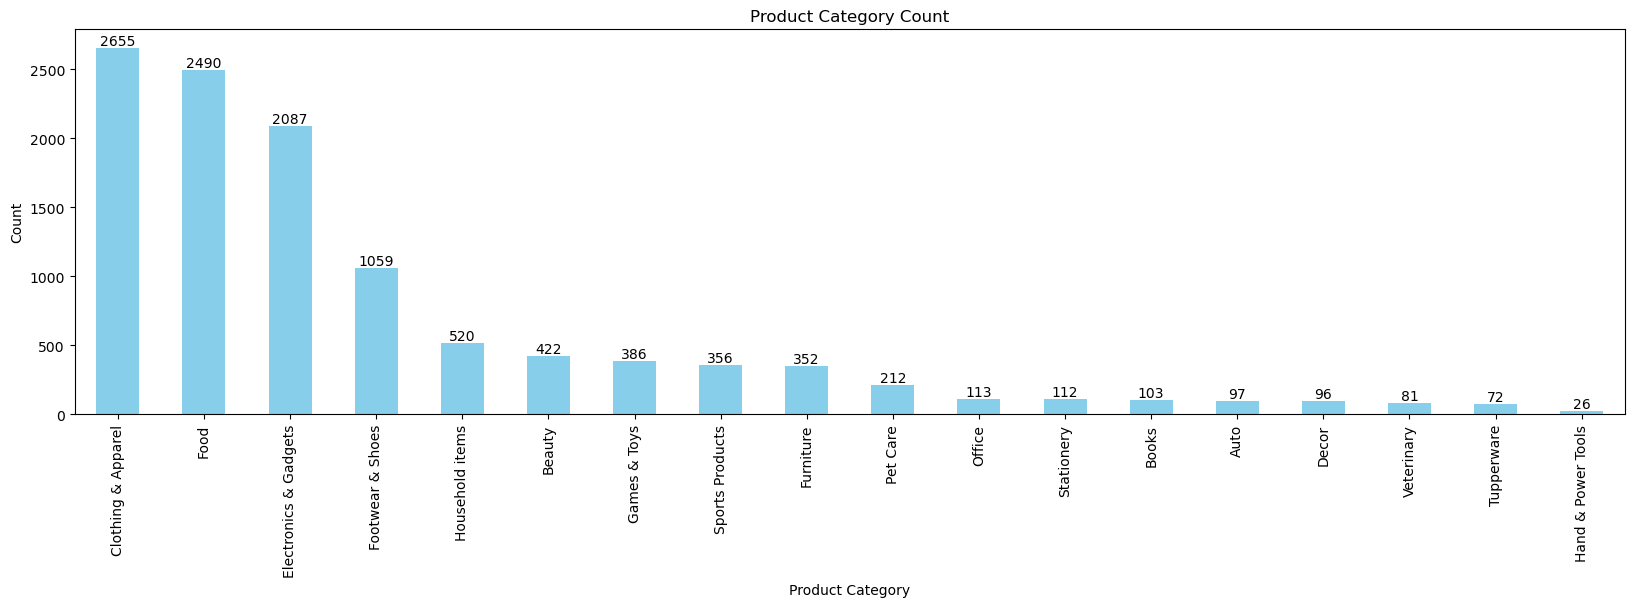

In [50]:
# Plot a count of Product Categories
product_category_counts = df['Product_Category'].value_counts()
plt.figure(figsize=(20, 5))
ax = product_category_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.title('Product Category Count')
ax.bar_label(ax.containers[0])
plt.show()


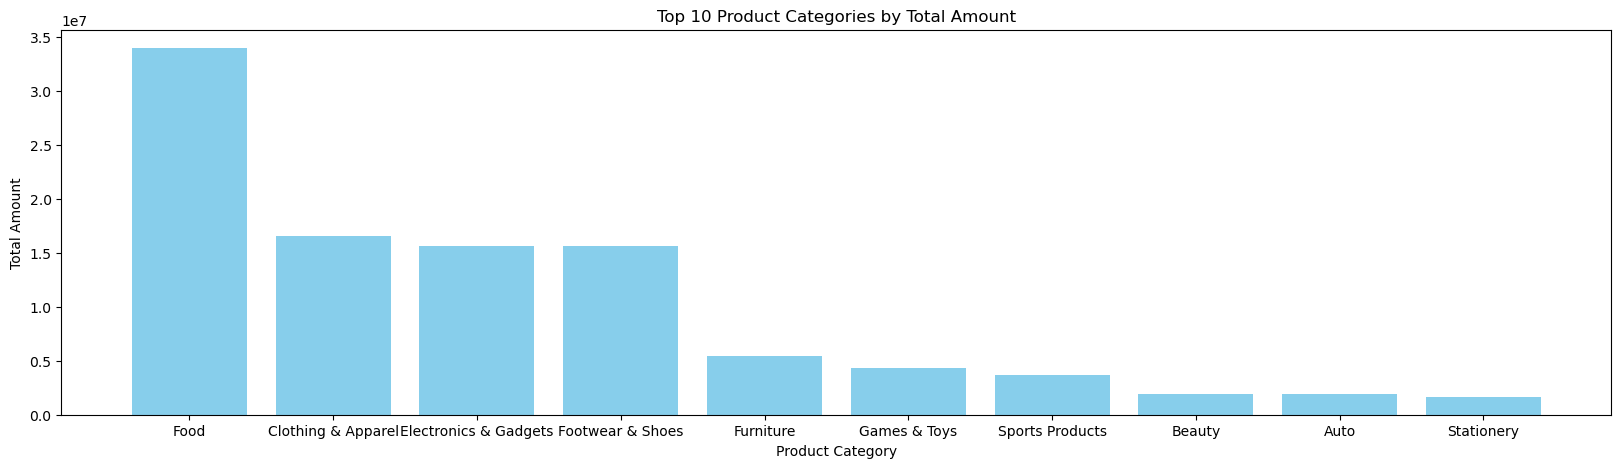

In [52]:
# Plot the total sales amount by product category
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
plt.figure(figsize=(20, 5))
plt.bar(sales_state['Product_Category'], sales_state['Amount'], color='skyblue')
plt.xlabel('Product Category')
plt.ylabel('Total Amount')
plt.title('Top 10 Product Categories by Total Amount')
plt.show()


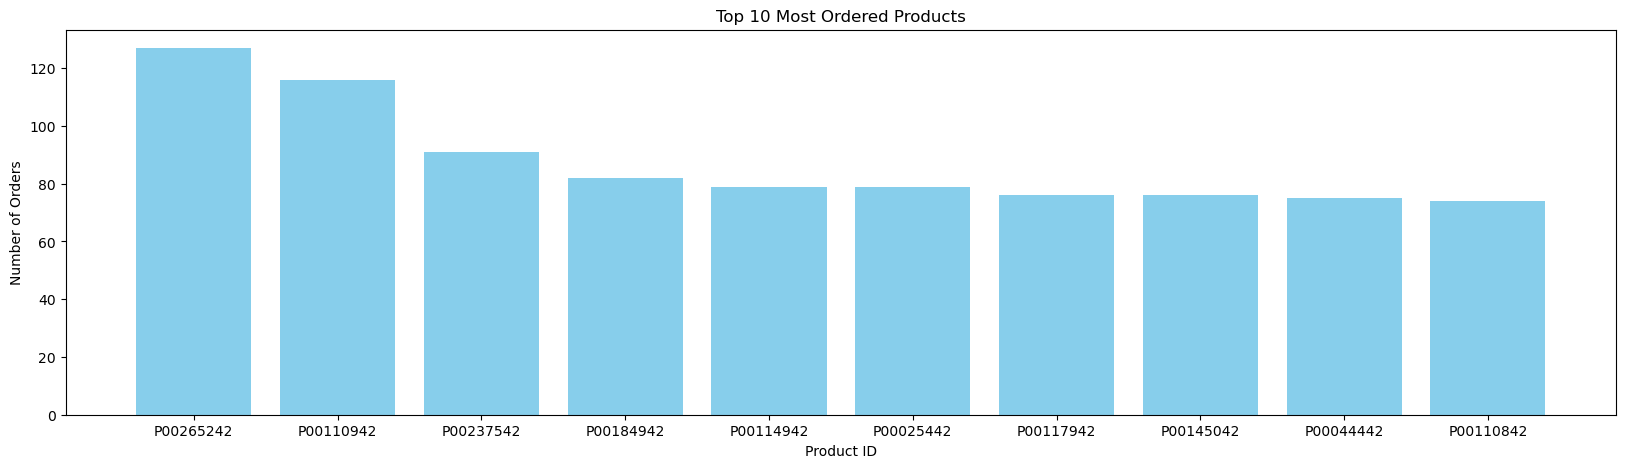

In [54]:
# Plot the top 10 most ordered products
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
plt.figure(figsize=(20, 5))
plt.bar(sales_state['Product_ID'], sales_state['Orders'], color='skyblue')
plt.xlabel('Product ID')
plt.ylabel('Number of Orders')
plt.title('Top 10 Most Ordered Products')
plt.show()

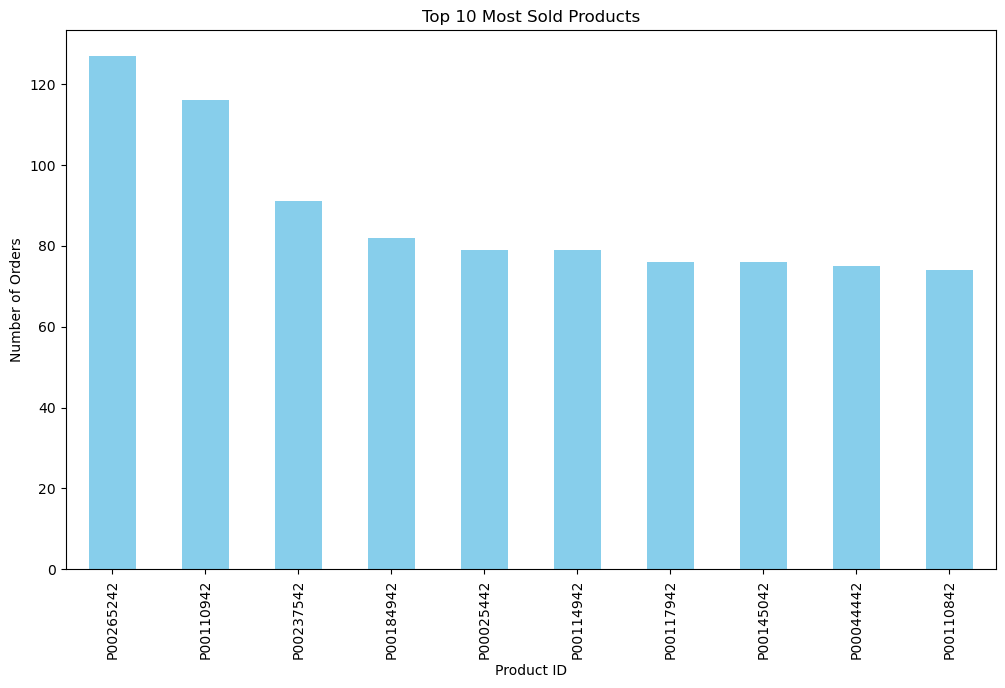

In [56]:
# Plot the top 10 most sold products (same thing as above)
plt.figure(figsize=(12, 7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.xlabel('Product ID')
plt.ylabel('Number of Orders')
plt.title('Top 10 Most Sold Products')
plt.show()
